<a href="https://colab.research.google.com/github/gregory-mc/Machine-Learning-Inmersion/blob/main/EDA_Notebook01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#########################################################################
#########------- Machine Learning Inmersion ------------#################
#########################################################################
# Capacitador: André Omar Chávez Panduro
# email: andre.chavez@urp.edu.pe
# Tema:  EDA 
# version: 1.0
#########################################################################

In [ ]:
# Conexion a Google Colaborative
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### **1. Carga de Modulos**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


### **2. Lectura Inicial de base de datos**

#### 2.1. Carga de datos

In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/MLIPy/S2/AdquisicionCreditoHipotecario.csv") # Ruta donde esta su set de datos!

In [ ]:
df.shape


(614, 13)

In [ ]:
# Visualizacion Global de los datos
df.tail(5)

,Loan ID,Gender,Married,Dependents,Education,Self Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


#### 2.2. Buenas prácticas

In [ ]:
df.columns

Index(['Loan ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
# Renombramos las variables por buenas prácticas
Columnsnames = ['ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']
df.columns = Columnsnames

#### 2.3. Identificando variables importantes/ delimitantes

In [ ]:
df.dtypes

ID                    object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
# Los préstamos de menos de menos de 10 años tienen sentido? Revisemos los brief o especificaciones de negocio.
df.groupby('Loan_Amount_Term').size()

Loan_Amount_Term
12.0       1
36.0       2
60.0       2
84.0       4
120.0      3
180.0     44
240.0      4
300.0     13
360.0    512
480.0     15
dtype: int64

In [ ]:
# Elegir los solo las caracteristicas deseadas!
df=df[df['Loan_Amount_Term']>=120]

In [ ]:
# Revisamos el tamaño nuevo del set de datos
df.shape

(591, 13)

In [ ]:
# Revisamos la nueva distribucion de datos
df.groupby(by='Loan_Amount_Term').size()

Loan_Amount_Term
120.0      3
180.0     44
240.0      4
300.0     13
360.0    512
480.0     15
dtype: int64

In [ ]:
# Guardamos el data frame generado
df.to_csv('') # Ruta a guardar el archivo generado!

#### 2.4. Los tipos de variables son los adecuados?

In [ ]:
# El ingreso que tipo de dato debería ser?
df.ApplicantIncome = df.ApplicantIncome.astype('float64')

#### 2.5. Diferenciamos el tipo de variales

In [ ]:
columnsNumeric = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History'] # Creen su lista de numericas
columnsString = ['Gender', 'Married', 'Dependents','Education','Self_Employed','Property_Area','Loan_Status'] # Crean su lista de categoricas

### **3. Análisis univariado**

#### 3.1. Estudiamos las variables numericas

Primeros descubrimientos

In [ ]:
# Descripcion o estadisticas basicas de un set de datos
df[columnsNumeric].describe()
# Conclusiones!
#Presencia de outliers al ver la difencia entre media y mediana.


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,591.000000,591.000000,569.000000,591.000000,543.000000
mean,5451.510998,1621.443181,147.441125,346.294416,0.847145
std,6214.208723,2963.384542,86.918473,55.353789,0.360179
min,150.000000,0.000000,9.000000,120.000000,0.000000
25%,2874.000000,0.000000,100.000000,360.000000,1.000000
50%,3814.000000,1210.000000,128.000000,360.000000,1.000000
75%,5818.500000,2253.500000,170.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [ ]:
df[columnsNumeric].dtypes

ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
dtype: object

In [ ]:
# Vista de los primeros registros, tenemos completitud de los datos?
df[columnsNumeric].head(10)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,NaN,360.0,1.0
1,4583.0,1508.0,128.0,360.0,1.0
2,3000.0,0.0,66.0,360.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0
4,6000.0,0.0,141.0,360.0,1.0
5,5417.0,4196.0,267.0,360.0,1.0
6,2333.0,1516.0,95.0,360.0,1.0
7,3036.0,2504.0,158.0,360.0,0.0
8,4006.0,1526.0,168.0,360.0,1.0
9,12841.0,10968.0,349.0,360.0,1.0


In [ ]:
# Notamos en la tabla anterior que algunas de las variables tienen valores nulos o missings
# Anecdota del INEI.

Apoyo del análisis visual

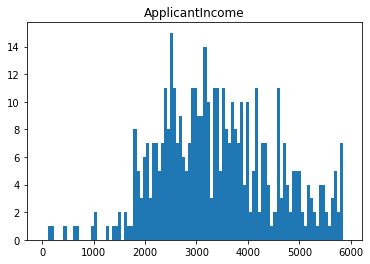

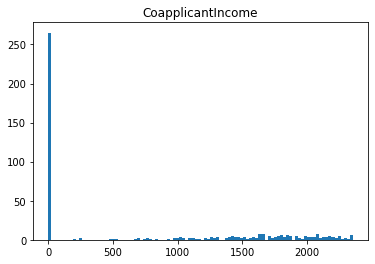

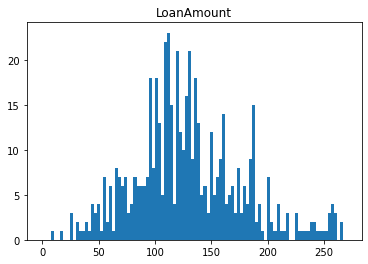

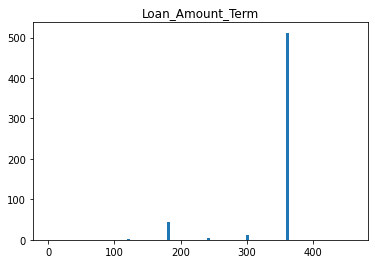

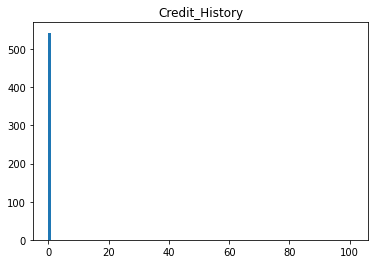

In [ ]:
# Es muy importante analizar las variables cuantitativas :
for x in columnsNumeric:
  Q03 = int(df[x].quantile(0.75))+100 # Ver la escala del grafico
  plt.title(df[x].name)
  plt.hist(df[x], bins= 100,range=(0,Q03) )
  plt.show()

In [ ]:
# Algunas conclusiones importantes?
# Las variables tienen distribución asimetrica positiva (cola derecha <outliers> )


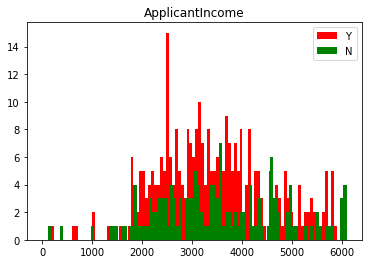

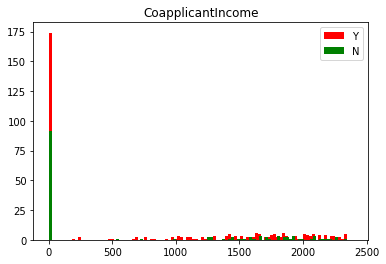

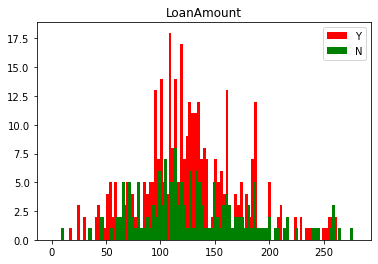

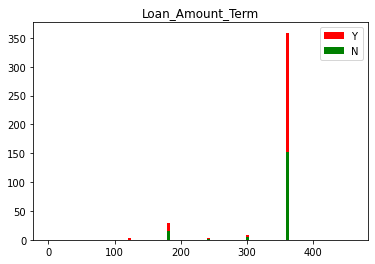

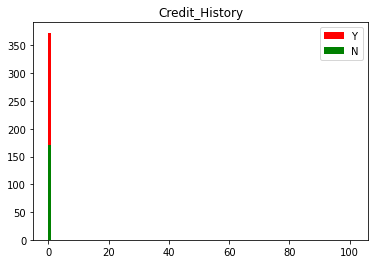

In [ ]:
# Es muy importante analizar las variables cuantitativas, sobre todo respecto al objetivo:
for x in columnsNumeric:
  # Generamos los subsets de comparación
  x1 = df.loc[df.Loan_Status =='Y', x]
  x2 = df.loc[df.Loan_Status =='N', x]
  Q03x1 = int(pd.DataFrame(x1)[x].quantile(0.75))+100
  Q03x2 = int(pd.DataFrame(x2)[x].quantile(0.75))+100

  # Mostramos las densidades
  plt.title(df[x].name)
  plt.hist(x1, bins= 100, color='r', range=(0,Q03x1), label='Y')
  plt.hist(x2, bins= 100, color='g', range=(0,Q03x2), label='N')
  plt.legend()
  plt.show()

In [ ]:
# Algunas conclusiones importantes?
# Todas son hipotesis que se deben constrastar con los datos!
# Mientras mayor dinero ganen, mayor es el dinero que se le presta

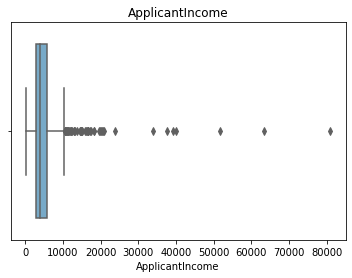

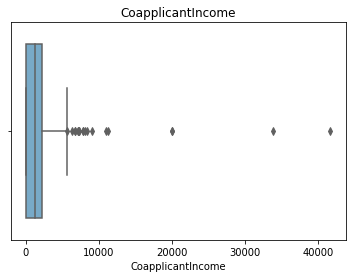

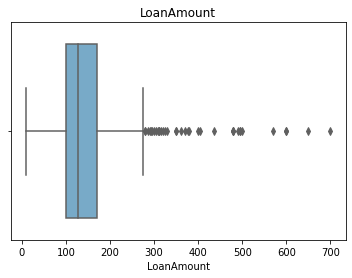

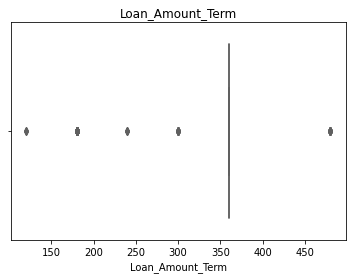

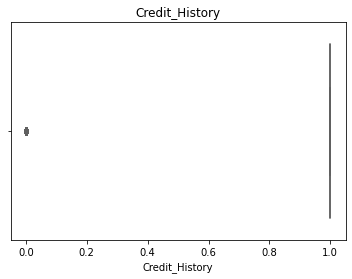

In [ ]:
# El grafico de cajas es muy importante pues nos muestra , dispersion, forma y atipicos:
for x in columnsNumeric:
  plt.title(df[x].name)
  sns.boxplot(x=df[x], palette="Blues");
  plt.show()

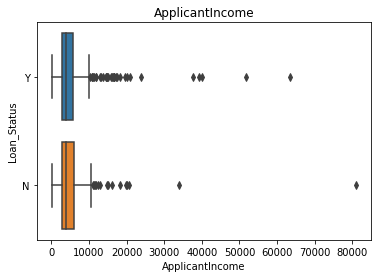

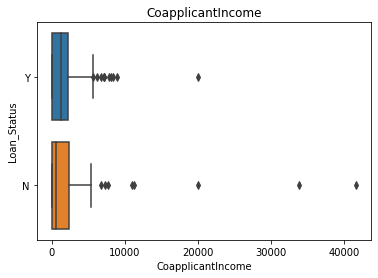

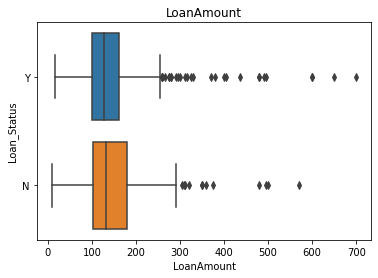

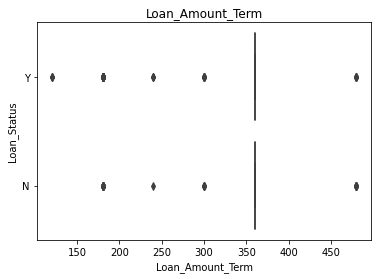

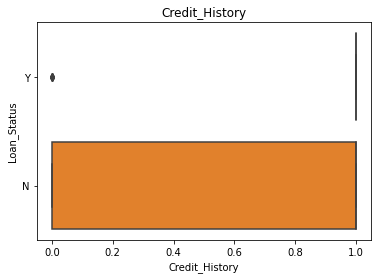

In [ ]:
# El grafico de cajas es muy importante pues nos muestra , dispersion, forma y atipicos; siempre respecto al target:
for x in columnsNumeric:
  plt.title(df[x].name)
  sns.boxplot(x=df[x], y = df.Loan_Status);
  plt.show()

In [ ]:
# Algunas conclusiones importantes?

Presencia de valores missing

In [ ]:
# Revision de valores misssings o nulos - Valores absolutos
df[columnsNumeric].isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History       48
dtype: int64

In [ ]:
# Revision de valores misssings o nulos - Valores relativos
df[columnsNumeric].isnull().sum()/df.shape[0]*100

ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.722504
Loan_Amount_Term     0.000000
Credit_History       8.121827
dtype: float64

In [ ]:
# Existen valores perdidos, el % es adecuado para imputarlos? se tienen que eliminar?
# Eliminar no es opcion, las opciones son imputar o creacion de variables sinteticas!

In [ ]:
# Imputando el valor de la variable LoanAmount, Monto del prestamo en que le dimos el credito

In [ ]:
df.LoanAmount.notnull().value_counts()

True     569
False     22
Name: LoanAmount, dtype: int64

In [ ]:
# Probamos distintas maneras de rellenar o imputar los valores perdidos / Tecnicas Univariadas
df['LoanAmount_2'] = df['LoanAmount'].fillna(0)                        # Imputaccion por criterio experto   --2 
df['LoanAmount_3'] = df['LoanAmount'].fillna(df.LoanAmount.mean())     # Imputaccion por media              --4
df['LoanAmount_4'] = df['LoanAmount'].fillna(df.LoanAmount.median())   # Imputaccion por mediana            --1
df['LoanAmount_5'] = df['LoanAmount'].fillna(method = 'backfill')      # Imputaccion por interpolacion      --3 

In [ ]:
# Mostramos las estadísticas principales de las nuevas variables
df[['LoanAmount','LoanAmount_2','LoanAmount_3','LoanAmount_4','LoanAmount_5']].describe()
# Con que imputacion se quedarian?

,LoanAmount,LoanAmount_2,LoanAmount_3,LoanAmount_4,LoanAmount_5
count,569.000000,591.000000,591.000000,591.000000,591.000000
mean,147.441125,141.952623,147.441125,146.717428,147.482234
std,86.918473,89.741537,85.282564,85.362078,86.161551
min,9.000000,0.000000,9.000000,9.000000,9.000000
25%,100.000000,98.000000,101.500000,101.500000,100.000000
50%,128.000000,126.000000,130.000000,128.000000,128.000000
75%,170.000000,165.500000,165.500000,165.500000,168.000000
max,700.000000,700.000000,700.000000,700.000000,700.000000


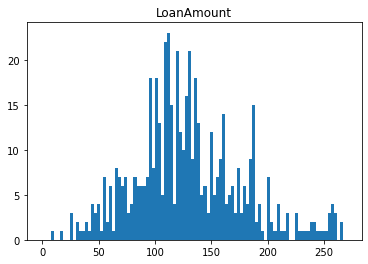

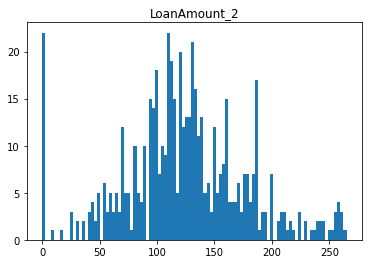

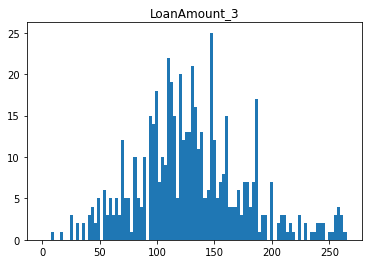

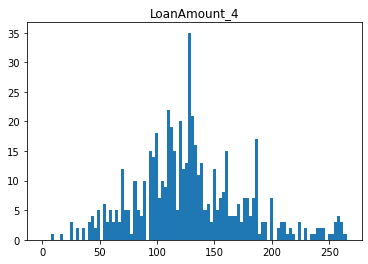

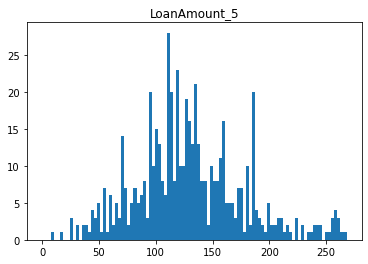

In [ ]:
# Revisamos como la imputacion de alguna manera cambia la distribucion de la variable
for x in ['LoanAmount','LoanAmount_2','LoanAmount_3','LoanAmount_4','LoanAmount_5']:
  Q03 = int(df[x].quantile(0.75))+100
  plt.title(df[x].name)
  plt.hist(df[x], bins= 100 ,range=(0,Q03))
  plt.show()

In [ ]:
# Vemos que la imputacion 4 y 5 son coherentes o interesantes!

Calculamos la asimetria y Kurtosis de las variables

In [ ]:
#Calculamos la asimetria y Kurtosis de las variables
from scipy.stats import kurtosis # Curtosis  Si es (-) -> Platicurtica ; es (0) -> Mesourtica ; es (+) -> Leptocurtica
from scipy.stats import skew     # Asimetria Si es (-) -> AsNegativa ; es (0)   -> Simetrica ;  es (+) -> AsPositiva

In [ ]:
# Generalizando las estadísticas
for variable in ['LoanAmount','LoanAmount_2','LoanAmount_3','LoanAmount_4','LoanAmount_5']:
    print('\n',df[variable].name,":")
    print('Asimetría: ','\n',round(skew(df[variable].dropna()),3))
    print('Kurtosis: ','\n',round(kurtosis(df[variable].dropna()),3))


 LoanAmount :
Asimetría:  
 2.623
Kurtosis:  
 9.886

 LoanAmount_2 :
Asimetría:  
 2.312
Kurtosis:  
 8.732

 LoanAmount_3 :
Asimetría:  
 2.673
Kurtosis:  
 10.384

 LoanAmount_4 :
Asimetría:  
 2.69
Kurtosis:  
 10.425

 LoanAmount_5 :
Asimetría:  
 2.629
Kurtosis:  
 9.971


In [ ]:
columnsNumeric

In [ ]:
#Retiramos variables numéricas
columnsNumeric.remove('LoanAmount_4')

In [ ]:
#Aderimos las nuevas variables numéricas
columnsNumeric2 = columnsNumeric + ['LoanAmount_5','LoanAmount_4']

In [ ]:
columnsNumeric2

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'LoanAmount_5',
 'LoanAmount_4']

#### 3.2. Estudiamos las variables categóricas

Primeros descubrimientos

In [ ]:
df[columnsString].describe(include='O')

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,578,588,577,591,560,591,591
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,471,383,331,465,482,227,408


In [ ]:
df[columnsString].dtypes

Gender           object
Married          object
Dependents       object
Education        object
Self_Employed    object
Property_Area    object
Loan_Status      object
dtype: object

In [ ]:
# Validar registros unicos
df[columnsString].nunique()

Gender           2
Married          2
Dependents       4
Education        2
Self_Employed    2
Property_Area    3
Loan_Status      2
dtype: int64

In [ ]:
# Validando registros únicos
print(df.shape)
print(df[columnsString].nunique())

(591, 17)
Gender           2
Married          2
Dependents       4
Education        2
Self_Employed    2
Property_Area    3
Loan_Status      2
dtype: int64


In [ ]:
# Mostramos la frecuencia de variables cateóricas para encontras hallazgos
for x in columnsString:
    print(x)
    print(df.groupby(x).size())
    print("\n")

Gender
Gender
Female    107
Male      471
dtype: int64


Married
Married
No     205
Yes    383
dtype: int64


Dependents
Dependents
0     331
1      98
2      99
3+     49
dtype: int64


Education
Education
Graduate        465
Not Graduate    126
dtype: int64


Self_Employed
Self_Employed
No     482
Yes     78
dtype: int64


Property_Area
Property_Area
Rural        173
Semiurban    227
Urban        191
dtype: int64


Loan_Status
Loan_Status
N    183
Y    408
dtype: int64




In [ ]:
#Retiramos las variables que no aportan
#columnsString.remove('Gender')
#df = df.drop(['Gender'],axis = 1)

In [ ]:
columnsString

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

Apoyo del análisis visual

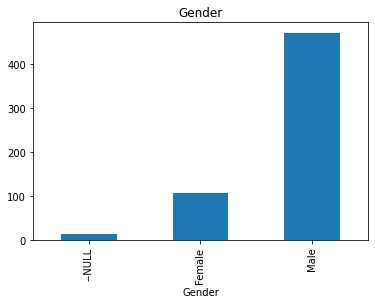

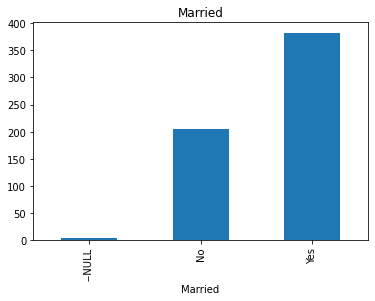

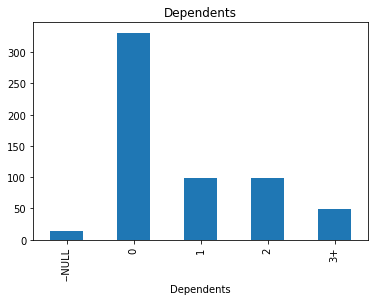

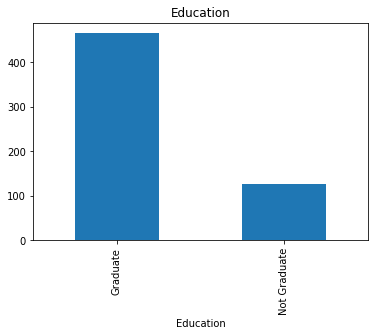

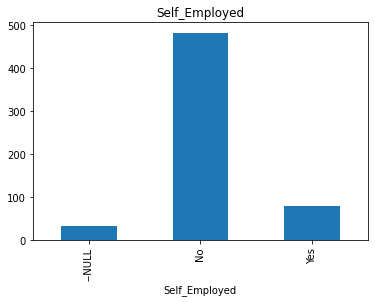

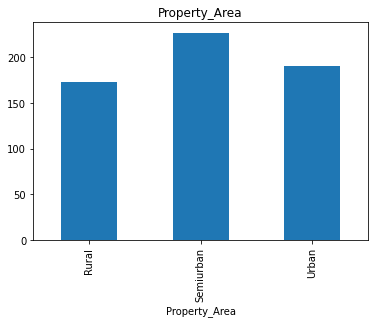

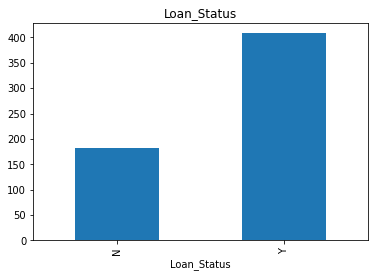

In [ ]:
#Columnas categoricas
for x in columnsString:
  plt.title(x)
  df.fillna("--NULL").groupby(x)[x].count().plot(kind = "bar")
  plt.show()

Presencia de valores missing

In [ ]:
#Presencia de valores missing
df[columnsString].isnull().sum()/df.shape[0]*100

Gender           2.199662
Married          0.507614
Dependents       2.368866
Education        0.000000
Self_Employed    5.245347
Property_Area    0.000000
Loan_Status      0.000000
dtype: float64

In [ ]:
columnsString

In [ ]:
df[columnsString].dtypes

In [ ]:
# Missings o valores perdidos absolutos
df[columnsString].isnull().sum() #obseva

Gender           13
Married           3
Dependents       14
Education         0
Self_Employed    31
Property_Area     0
Loan_Status       0
dtype: int64

In [ ]:
# Missings o valores perdidos relativos


In [ ]:
#Como el porcentaje de nan no es muy grande, hacemos imputacion por moda o criterio experto y seguimos trabajando.
df['Married'] =       df['Married'].fillna('Yes')
df['Gender'] =        df['Gender'].fillna('Male')
df['Dependents'] =    df['Dependents'].fillna('0')
df['Self_Employed'] = df['Self_Employed'].fillna('No')

# Completar las demas variables

Recodificamos variables importantes

In [ ]:
df.groupby('Dependents').size()/df.shape[0]*100

Dependents
0     58.375635
1     16.582064
2     16.751269
3+     8.291032
dtype: float64

In [ ]:
# Siempre hacemos una nueva columna para probar y despues si todo esta bien la eliminamos
df['Dependents2'] = df['Dependents']

In [ ]:
df['Dependents2'] = df['Dependents2'].replace('3+','3')

In [ ]:
df.groupby('Dependents2').size()/df.shape[0]*100

Dependents2
0    58.375635
1    16.582064
2    16.751269
3     8.291032
dtype: float64

In [ ]:
df = df.drop(['Dependents'],axis = 1)

In [ ]:
df.head(5)

,ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_2,LoanAmount_3,LoanAmount_4,LoanAmount_5,Dependents2
0,LP001002,Male,No,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y,0.0,147.441125,128.0,128.0,0
1,LP001003,Male,Yes,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N,128.0,128.000000,128.0,128.0,1
2,LP001005,Male,Yes,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y,66.0,66.000000,66.0,66.0,0
3,LP001006,Male,Yes,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y,120.0,120.000000,120.0,120.0,0
4,LP001008,Male,No,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y,141.0,141.000000,141.0,141.0,0


### **4. Análisis Multivariado**

#### 4.1. Relación entre variables

In [ ]:
columnsNumeric

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'LoanAmount_4']

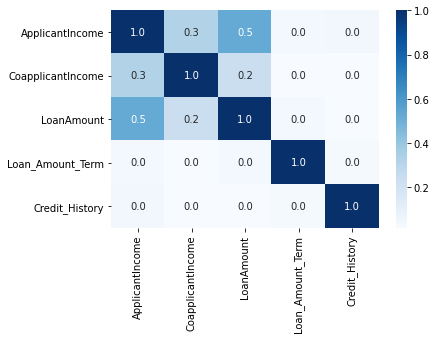

In [ ]:
# Analizamos la correlación de las variables. Es importante la estandarización en las variables?
sns.heatmap(abs(df[columnsNumeric].corr(method='spearman')), annot=True, fmt='.1f', cmap='Blues')
plt.show()

 #### 4.2. Análisis de Varianza (ANOVA)

In [ ]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df.dtypes

ID                    object
Gender                object
Married               object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
LoanAmount_2         float64
LoanAmount_3         float64
LoanAmount_4         float64
LoanAmount_5         float64
Dependents2           object
dtype: object

In [ ]:
# Buscamos las variables adecuadas para el analisis de varianza - ANOVA
# Anova: Y : Cuantitativa ;  X: Cualitativa
df[['LoanAmount_5','Loan_Status']].head()

,LoanAmount_5,Loan_Status
0,128.0,Y
1,128.0,N
2,66.0,Y
3,120.0,Y
4,141.0,Y


In [ ]:
# Buscamos las variables adecuadas para el analisis de varianza - ANOVA
df[['LoanAmount_5','Loan_Status']].dtypes

LoanAmount_5    float64
Loan_Status      object
dtype: object

In [ ]:
df.groupby('Loan_Status').size()

Loan_Status
N    183
Y    408
dtype: int64

In [ ]:
# Generamos nuestro set de muestras
M_1 = df[df['Loan_Status'] == 'Y']['LoanAmount_5']
M_2 = df[df['Loan_Status'] == 'N']['LoanAmount_5']

In [ ]:
# si el p_value < 0.05 existes diferencias significadas entre los grupos

In [ ]:
# Obtenemos el valor F y p_value del ANOVA
fvalue, pvalue = stats.f_oneway(M_1, M_2)
print(fvalue, pvalue)

1.1046113892835006 0.29368733044351125


In [ ]:
# H0: No existe diferencia en los montos de prestamos adeudados en las personas que les doy o no el prestamos
# H1: 
# p-valor < 0.05 ------>  La variable es significativa, es importante, la variable discrimina.
# 0.29368733044351125   -> No es importante! o No es el metodo adecuado!

In [ ]:
# Existen más relaciones entre variables cuantitativas y cualitativas? . Cuál consideras más importante para el marco de datos que estamos analizando?
# ## ------------------------------------------------- ## #

#### 4.3. Tecnicas de imputación avanzada


In [ ]:
# Tecnicas de Imputacion Multivariante

In [ ]:
df2 = pd.read_csv('/content/gdrive/MyDrive/MLIPy/S2/AdquisicionCreditoHipotecario.csv') #Ruta donde esta su set de datos!

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute       import IterativeImputer
from sklearn.impute import SimpleImputer

In [ ]:
# Revisamos si el dataset esta completo o no?
# Completitud de los datos!
df2.isnull().sum()

Loan ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit History       50
Property_Area         0
Loan_Status           0
dtype: int64

##### Imputación Univariada

In [ ]:
# Generamos el imputador simple - Imputacion Univariada Numerico
imp_univ_num = SimpleImputer(missing_values=np.nan, strategy='median') # Instanciar
imp_univ_num

# Generamos el imputador simple - Imputacion Univariada Categorico
# Completar

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [ ]:
imp_univ_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent') # Instanciarimp_univ_cat

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='most_frequent', verbose=0)

In [ ]:
# Elegimos algunas variables numericas o categoricas para trabajar!
data_impt_num = ["LoanAmount","Loan_Amount_Term"]
data_impt_cat =["Gender","Dependents","Self Employed","Credit History"]

In [ ]:
# Revisamos los valores perdidos tanto numericos como categoricos


In [ ]:
# Realizamos la imputación univariada en una nueva base de datos - Variables Numericas
imp_univ_num.fit(df2[data_impt_num])         # 1° Ajuste
#imp_univ_num.transform(data_impt_num)
imputed_data_univ_num = pd.DataFrame(data=imp_univ_num.transform(df2[data_impt_num]),  # Prediccion
                             columns=['LoanAmount', 'Loan_Amount_Term'],dtype='float')

In [ ]:
# Realizamos la imputación univariada en una nueva base de datos - Variables Categoricas
imp_univ_cat.fit(df2[data_impt_cat])         # 1° Ajuste
#imp_univ_num.transform(data_impt_num)
imputed_data_univ_cat = pd.DataFrame(data=imp_univ_cat.transform(df2[data_impt_cat]),  # Prediccion
                             columns=["Gender","Dependents","SelfEmployed","Credit History"],dtype='object')

In [ ]:
# Revisamos la imputacion
imputed_data_univ_cat.isnull().sum()

Gender            0
Dependents        0
SelfEmployed      0
Credit History    0
dtype: int64

In [ ]:
# Unimos los set de datos!
df3=pd.concat([imputed_data_univ_num,imputed_data_univ_cat],axis=1)
df3.head()

,LoanAmount,Loan_Amount_Term,Gender,Dependents,SelfEmployed,Credit History
0,128.0,360.0,Male,0,No,1
1,128.0,360.0,Male,1,No,1
2,66.0,360.0,Male,0,Yes,1
3,120.0,360.0,Male,0,No,1
4,141.0,360.0,Male,0,No,1


In [ ]:
# Comprobamos los valores nulos!

LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Gender              0
Married             0
Dependents          0
dtype: int64

##### Imputación Multivariada

In [ ]:
df4 = pd.read_csv('/content/gdrive/MyDrive/MLIPy/S2/AdquisicionCreditoHipotecario.csv') #Ruta donde esta su set de datos!

In [ ]:
df4.isnull().sum()

Loan ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
data_impt = df4[['LoanAmount', 'Loan_Amount_Term', 'Credit History']]

In [ ]:
# Generamos el imputador iterativo - Imputacion Multivariada
imp_mult = IterativeImputer(missing_values=np.nan, max_iter=10, 
                            n_nearest_features=10,
                            random_state=0)
imp_mult

IterativeImputer(add_indicator=False, estimator=None,
                 imputation_order='ascending', initial_strategy='mean',
                 max_iter=10, max_value=None, min_value=None,
                 missing_values=nan, n_nearest_features=10, random_state=0,
                 sample_posterior=False, skip_complete=False, tol=0.001,
                 verbose=0)

In [ ]:
# Realizamos la imputación multivariada en una nueva base de datos
imp_mult.fit(data_impt)
imputed_data_multi = pd.DataFrame(data=imp_mult.transform(data_impt), 
                             columns=['LoanAmount', 'Loan_Amount_Term', 'Credit_History'],dtype='float')

In [ ]:
imputed_data_multi.isnull().sum()

LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
dtype: int64

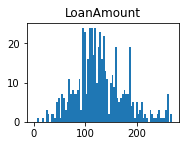

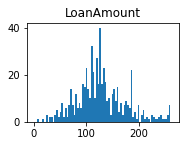

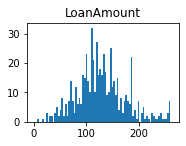

In [ ]:
# Comparamos los distintos metodos de imputacion
plt.figure()

plt.subplot(2,2,1)
Q03 = int(df2["LoanAmount"].quantile(0.75))+100
plt.title(df2["LoanAmount"].name)
plt.hist(df2["LoanAmount"], bins= 80 ,range=(0,Q03))
plt.show()

plt.subplot(2,2,2)
Q03 = int(df3["LoanAmount"].quantile(0.75))+100
plt.title(df3["LoanAmount"].name)
plt.hist(df3["LoanAmount"], bins= 80 ,range=(0,Q03))
plt.show()

plt.subplot(2,2,2)
Q03 = int(imputed_data_multi["LoanAmount"].quantile(0.75))+100
plt.title(imputed_data_multi["LoanAmount"].name)
plt.hist(imputed_data_multi["LoanAmount"], bins= 80 ,range=(0,Q03))
plt.show()

In [ ]:
# Calcular algunas estadísticas descriptivas de los datos sin imputacion, con imputacion univariada y 
# con imputacion multivariada.
# Qué imputación es la más adecuada?

In [ ]:
# Gracias!